# Long Short-term Memory model (LSTM)

As it has been mentioned in the previous notebook, the neurons of recurrent neural networks (RNNs) have an ability to retain cell memory that also influences the perception of new inputs. It all works fine, when we are dealing with problems with large separation between the predicted value and input, we face so-called ***vanishing gradient*** problem.

#### Vanishing gradient

![sigmoid](https://miro.medium.com/max/1250/1*6A3A_rt4YmumHusvTvVTxw.png)

In simple terms, during the process of training a neural network, we are multiplying weights of each layers. However, if these weights (less than 1) are multiplied many times, we reach an extremely small values. Therefore, the weights of those earlier layers will not be changed signifficantly and our network will not be able to learn long-term dependencies.

This brings brings us to **LSTM** that introduces changes RNN in larger series analysis.


## LSTM Structure

![LSTM](http://adventuresinmachinelearning.com/wp-content/uploads/2017/09/LSTM-diagram.png)

The main difference between the LSTM and RNN structure is that LSTM has special kind of units (so-called, **LSTM cells**) instead of regular neural network layers. In the following sections, we will have a look at each structural unit of LSTM cell.


### Input

As it can be seen in the figure above, the input value is first concatenated to the output of the previous cell. This new input is then squashed between -1 and 1 using $tanh$ activation function:

$g = tanh(x_tU^g + h_tV^g + b^g)$

Here $U$, $V$ and $b$ are weights and bias respectively (*note that exponents g does not imply raising in power, but rather show that these are weights and biases at the input gate*).

This squashed input is then multiplied element-wise by the input layer of sigmoid activated nodes. The existance of sigmoid function (output in the range of 0-1) allows to "eliminate" insignifficant . The output of the sigmoid nodes can be expressed as:

$i = \sigma(x_tU^i + h_tV^i + b^i)$

After element-wise multiplication, we get the output of our input section:

$g*i$

### Forget gate

The output of the input section is then passed through the forget gate loop. LSTM at this section has an internal state variable $s_t$ which is added to the lagged state ($s_{t-1}$). This addition operation is used instead of multiplication allows to reduce the risk of vanishing gradients while the forget gate itself helps model to learn only signifficant state variables.

Mathematically, the forget gate output can be expressed as:

$f = \sigma(x_tU^f + h_tV^f + b^f)$

Multiplying this by the previous state value and adding the input gate output, we get the new state value:

$s_t = s_{t-1}*f+g*i$

### Output gate

At the output gate, we have to multiply the squashed ($tanh$ activation function) current state value by the forget output passed through the sigmoid function. In mathematical terms:

$h_t = tanh(s_t)*\sigma(x_tU^o + h_tV^o + b^o)$

## Keras implementation

As we have now covered all required theory, we are going to look how all of it can be implemented in Keras (*we are not going to be covering implementation from scratch*).

Let's create a simple sine function dataset:

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math

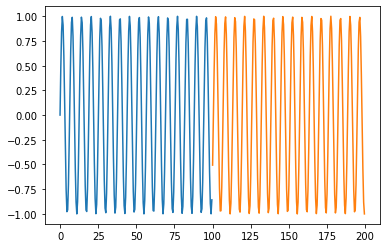

In [77]:
X_train = np.arange(0,100,0.5) 
y_train = np.sin(X_train)

X_test = np.arange(100,200,0.5) 
y_test = np.sin(X_test)

train_series = y_train.reshape((len(y_train), 1))
test_series  = y_test.reshape((len(y_test), 1))

plt.plot(X_train, y_train)
plt.plot(X_test, y_test)

On the other hand, as you might remember from the RNN notebook, the sequential data models are trained by passing array of lagged data as an input and future data as the output. Let's create function, that translates our dataset into such batches (for the start, we will use look-back period of 1).

In [78]:
def dataset(data, look_back):
    X, y = [], []
    
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), ]
        X.append(a)
        y.append(data[i + look_back, ])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = dataset(train_series, look_back)
X_test, y_test = dataset(test_series, look_back)

After splitting data into batches, we can now create our simple LSTM model

In [79]:
model = tf.keras.models.Sequential([
    #Create model
    ___
])

#Compile your model
___

#Fit model
___

Epoch 1/100
20/20 [==============================] - 2s 3ms/step - loss: 0.4965
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4803
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4649
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4495
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4342
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4192
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4035
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3883
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3729
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3573
Epoch 11/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3417
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 13/100
20/20 [=================

Finally, let's test our model with the validation dataset.

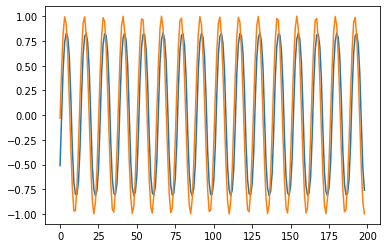

In [80]:
test_predictions  = model.predict(X_test).reshape(199, 1)
plt.plot(test_predictions)
plt.plot(y_test)